In [33]:
import os
import xlrd
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math
import datetime as dt
import copy
import matplotlib.dates as mdate
import scipy.optimize as spo
from scipy.stats import norm
import statsmodels.api as sm

In [23]:
def medianpeak(x):
    y=np.copy(x)
    ymedian=np.median(y)
    zmid=np.median(np.abs(y-np.median(y)))
    y[y<=ymedian-5.2*zmid]=(ymedian-5.2*zmid)
    y[y>=ymedian+5.2*zmid]=(ymedian+5.2*zmid)
    return y
def meanadjust(x):
    y=np.copy(x)
    yme=np.median(y)
    ytm=y-yme
    return ytm

def nondimensionalize(x):
    y=np.copy(x)
    ymean=np.mean(y)
    ystd=np.std(y)
    y=(y-ymean)/ystd
    return y
def dadjust(data):
    data0=copy.deepcopy(data)
    index1=data0.index.to_period(freq=frequency).values
    fre=np.unique(index1)
    data0.index=index1
    data0.index=data0.index.to_series().astype(str).values
    return data0

In [192]:
frequency='W'
gronum1=100
path1='C:\\Users\\wuboyuan\\Desktop\\data\\id\\'

In [151]:
trdayfile='C:\\Users\\wuboyuan\\Desktop\\data\\mudata\\tradeday.csv'
stfile='C:\\Users\\wuboyuan\\Desktop\\data\\mudata\\ST.csv'
stand9500='C:\\Users\\wuboyuan\\Desktop\\data\\mudata\\stand.csv'
closep='C:\\Users\\wuboyuan\\Desktop\\data\\mudata\\closeprice.csv'
mvalue0='C:\\Users\\wuboyuan\\Desktop\\data\\mudata\\marketvalue.csv'
yiziban0='C:\\Users\\wuboyuan\\Desktop\\data\\mudata\\yiziban.csv'
trdaydata=pd.read_csv(trdayfile,parse_dates=True,index_col=0)
u=trdaydata.index[0]
trdaydata=trdaydata.T
for i in range(len(trdaydata)):
    y=trdaydata.iloc[i]
    z=y[y==1].index
    if len(z)>250:
        if z[0]!=u:
                y[z[0]:z[250]]=0
        else:
            y=y
    elif len(z)==0:
        y=y
    else:
        y[z[0]:]=0
trdaydata=trdaydata.T
trdaydata0=dadjust(trdaydata)
stdata=pd.read_csv(stfile,parse_dates=True,index_col=0)
stdata0=dadjust(stdata)
stand00=pd.read_csv(stand9500,parse_dates=True,index_col=0)
stand500=dadjust(stand00)
closepr=pd.read_csv(closep,parse_dates=True,index_col=0)
closeprice=dadjust(closepr)
mvalue=pd.read_csv(mvalue0,parse_dates=True,index_col=0)
mvalue=dadjust(mvalue)
yiziban0=pd.read_csv(yiziban0,parse_dates=True,index_col=0,encoding='gbk')
yiziban0=dadjust(yiziban0)
stfre=np.unique(stdata0.index)

In [94]:
for i in range(len(stfre)-1):
    tradeday0=trdaydata0.loc[stfre[i]]
    st0=stdata0.loc[stfre[i]]
    wstand500=stand500.loc[stfre[i]]
    yzb0=yiziban0.loc[stfre[i]]
    #wcloseprice=closeprice.loc[stfre[i]]
    l=len(pd.DataFrame(st0).T)
    if i ==0:
        w_stand500=pd.DataFrame(wstand500).T
        tradeday=pd.DataFrame(tradeday0).T
        st=pd.DataFrame(st0).T
        yzb=pd.DataFrame(yzb0).T
        #w_closeprice=pd.DataFrame(wcloseprice).T
    else:
        if l!=1:
            tradeday1=tradeday0[len(tradeday0)-1:len(tradeday0)]
            tradeday=tradeday.append(tradeday1)
            st1=st0[len(st0)-1:len(st0)]
            #wcloseprice1=wcloseprice[len(wcloseprice)-1:len(wcloseprice)]
            #w_closeprice=w_closeprice.append(wcloseprice1)
            st= st.append(st1)
            yzb1=yzb0[len(yzb0)-1:len(yzb0)]
            yzb=yzb.append(yzb1)
            wstand5001= wstand500[len(wstand500)-1:len(wstand500)]
            w_stand500=w_stand500.append(wstand5001)
        else:
            tradeday2=pd.DataFrame(tradeday0).T
            tradeday=tradeday.append(tradeday2)
            st2=pd.DataFrame(st0).T
            st= st.append(st2)
            #wcloseprice2=pd.DataFrame(wcloseprice).T
            #w_closeprice=w_closeprice.append(wcloseprice2)
            wstand5002=pd.DataFrame(wstand500).T
            w_stand500=w_stand500.append(wstand5002) 
            yzb2=pd.DataFrame(yzb0).T
            yzb=yzb.append(yzb2)

In [95]:
rate500=(stand500-stand500.shift(1))/stand500.shift(1)
closerate=(closeprice-closeprice.shift(1))/closeprice.shift(1)
w_rate500=(w_stand500-w_stand500.shift(1))/w_stand500.shift(1)
w_rate500=w_rate500[1:]

In [96]:
ratefile='C:\\Users\\wuboyuan\\Desktop\\data\\mudata\\rate.csv'
errate11=pd.read_csv(ratefile,parse_dates=True,index_col=0)
errate1=dadjust(errate11)

In [160]:
name1=os.listdir(path1)

In [161]:
file={}
data={}
key=[]
data0={}
fre={}
for i in range(len(name1)):
    file[i]=os.path.join(path1,name1[i])
    data[name1[i][0:-4]]=pd.read_csv(file[i],parse_dates=True,index_col=0)
    key.append(name1[i][0:-4])
    data0[key[i]]=dadjust(data[key[i]])
fre=np.unique(data0[key[len(name1)-1]].index)

In [184]:
fre=np.unique(data0[key[len(name1)-1]].index)
dic={}
group={}
n_group={}
n_dic={}

In [185]:
file

{0: 'C:\\Users\\wuboyuan\\Desktop\\data\\id\\EBIT息税前利润.csv',
 1: 'C:\\Users\\wuboyuan\\Desktop\\data\\id\\PB.csv',
 2: 'C:\\Users\\wuboyuan\\Desktop\\data\\id\\PCF.csv',
 3: 'C:\\Users\\wuboyuan\\Desktop\\data\\id\\PE.csv',
 4: 'C:\\Users\\wuboyuan\\Desktop\\data\\id\\PS.csv',
 5: 'C:\\Users\\wuboyuan\\Desktop\\data\\id\\净资产收益率.csv',
 6: 'C:\\Users\\wuboyuan\\Desktop\\data\\id\\周振幅2.csv',
 7: 'C:\\Users\\wuboyuan\\Desktop\\data\\id\\每股公积金.csv',
 8: 'C:\\Users\\wuboyuan\\Desktop\\data\\id\\营业利润率.csv',
 9: 'C:\\Users\\wuboyuan\\Desktop\\data\\id\\资产负债率.csv'}

In [193]:
all_index={}
for i in range(len(fre)):
    ''' tradeday0=tradeday.loc[fre[i-1]]
    dindex=tradeday0[tradeday0!=0].T.dropna().index
    ust=st.loc[fre[i-1]]
    ust=ust[ust!=1]
    d_gindex=ust[dindex].dropna().index
    yzb_index=yzb.loc[fre[i-1]]
    yzb_index=yzb_index[yzb_index==0].T.index
    d_gindex=d_gindex&yzb_index
    '''
    if i==0:
        dic[i]=0
    else:
        tradeday0=tradeday.loc[fre[i-1]]
        dindex=tradeday0[tradeday0!=0].T.dropna().index
        ust=st.loc[fre[i-1]]
        ust=ust[ust!=1]
        d_gindex=ust[dindex].dropna().index
        yzb_index=yzb.loc[fre[i-1]]
        yzb_index=yzb_index[yzb_index==0].T.index
        d_gindex=d_gindex&yzb_index
        for mu in range(len(key)):
            data1=data0[key[mu]].loc[fre[i-1]]
            data1=data1[d_gindex]
            data1=data1.dropna().astype(float)
            data1=pd.DataFrame(data1).apply(meanadjust).abs().apply(medianpeak).apply(nondimensionalize)
            #data1=pd.DataFrame(data1).apply(medianpeak).apply(nondimensionalize)
            if mu==0:
                n_data=data1
            else:
                n_data=n_data+data1
        n_data=n_data.dropna().sort_values(by=fre[i-1],ascending=False)
        n_l=len(n_data)
        for j in range(int(gronum1)):
                n_group[j]=n_data[round(((j)/int(gronum1))*n_l):round(((j+1)/int(gronum1))*n_l)].index
        n_dic[i]=copy.deepcopy(n_group)

In [124]:
len(fre)

372

In [194]:
n_mrate=np.zeros(len(fre)-1)
n_dicrate={}
n_grorate=np.zeros(int(gronum1))
for j in range(int(gronum1)):
    for i in range(len(fre)-1):
        n_mrate[i]=errate1[n_dic[i+1][j]].loc[fre[i+1]].mean()
    n_dicrate[j]= copy.deepcopy(n_mrate)
for k in n_dicrate:
    n_grorate[k]=n_dicrate[k].mean()

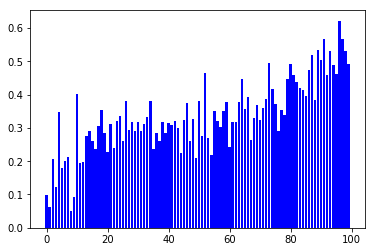

In [195]:
#plt.figure(13)
num=np.arange(len(n_grorate))
plt.bar(num,n_grorate, color = 'b')
#photo1='C:\\Users\\wuboyuan\\Desktop\\data\\cph\\单调性.png'
#plt.savefig(photo1)
plt.show()

In [196]:
unitnet0=n_dicrate[99]-0.2
unitnet=unitnet0.cumsum()
unitnet=unitnet/100+1
w_rate=w_rate500.cumsum()+1

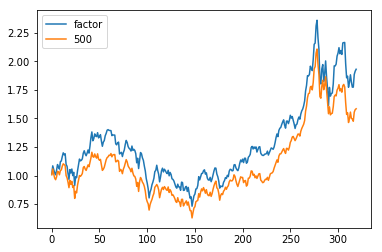

In [197]:
plt.figure(11)
plt.plot(unitnet,label='factor')
plt.plot(w_rate.T.values[0][0:len(unitnet)],label='500')
plt.legend(loc=0, numpoints=1)
plt.show()
#photo1='C:\\Users\\wuboyuan\\Desktop\\data\\cph\\净值.png'
#plt.savefig(photo1)

In [117]:
plt.figure(12)
plt.plot(unitnet-w_rate.T.values[0][0:len(unitnet)])
plt.show()
#photo1='C:\\Users\\wuboyuan\\Desktop\\data\\cph\\超额净值.png'
#plt.savefig(photo1)

ValueError: operands could not be broadcast together with shapes (371,) (370,) 

In [123]:
unitnet[0:len(unitnet)-1]-w_rate.T.values[0][0:len(unitnet)-1]

371

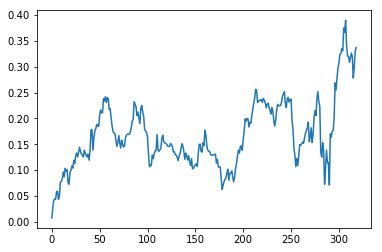

In [198]:
plt.plot(unitnet[0:len(unitnet)-1]-w_rate.T.values[0][0:len(unitnet)-1])
plt.show()

In [128]:
len(w_rate.T.values[0])

370